## Table of Contents
* [1. Presentation and main features](#1.-Presentation-and-main-features)
	* [1.1 Implementation principle](#1.1-Implementation-principle)
	* [1.2 Support for simple LaTeX commands](#1.2-Support-for-simple-LaTeX-commands)
	* [1.3 Available environments](#1.3-Available-environments)
	* [1.4 Automatic numerotation, labels and references](#1.4-Automatic-numerotation,-labels-and-references)
	* [1.5 Bibliography](#1.5-Bibliography)
		* [1.5.1 Usage](#1.5.1-Usage)
		* [1.5.2 Implementation](#1.5.2-Implementation)
	* [1.6 Figure environment](#1.6-Figure-environment)
	* [1.7 Other features](#1.7-Other-features)
	* [1.8 User interface](#1.8-User-interface)
		* [1.8.1 Buttons on main toolbar](#1.8.1-Buttons-on-main-toolbar)
		* [1.8.2 Configuration toolbar](#1.8.2-Configuration-toolbar)
* [2. Installation, usage and further examples](#2.-Installation,-usage-and-further-examples)
	* [2.1 Installation](#2.1-Installation)
	* [2.2 First example (continued)](#2.2-First-example-%28continued%29)
	* [2.3 Second example](#2.3-Second-example)
	* [2.4 Third example:](#2.4-Third-example:)
* [3. (post)-Converters](#3.-%28post%29-Converters)
	* [3.1 Installation](#3.1-Installation)
	* [3.2 Conversion to html](#3.2-Conversion-to-html)
	* [3.3 Conversion to LaTeX](#3.3-Conversion-to-LaTeX)
* [4. Disclaimer, sources and thanks](#4.-Disclaimer,-sources-and-thanks)


<h1>  (some) LaTeX environments for Jupyter notebook </h1>

In [14]:
%%javascript 
IPython.utils.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [ ]:
%%html
<style>
    .prompt{
        display: none;
    }    

</style>

# 1. Presentation and main features

This extension for IPython 3.x or Jupyter enables to use some LaTeX commands and environments in the notebook's markdown cells. 
\begin{enumerate}
\item **LaTeX commands and environments**
\begin{itemize}
\item support for some LaTeX commands within markdown cells, *e.g.* `\textit`, `\textbf`, `\underline`
\item support for **theorems-like environments**
\item support for **lists**: *enumerate, itemize*,  
\item limited support for a **figure environment**,
\item support for an environment *listing*,
\item additional *textboxa* environment
\end{itemize}
\item **Citations and bibliography**
\begin{itemize}
\item support for `\cite` with creation of a References section
\end{itemize}
\item **Document-wide numbering of equations, support for `\label` and `\ref`**
\item **Configuration toolbar**
\item Styles can be customized in the *latex_env.css* stylesheet
\end{enumerate}

A simple illustration is as follows: on can type the following in a markdown cell
\begin{listing}
\begin{theorem} \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}
\end{listing}
and have it rendered as

\begin{theorem} \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}

## 1.1 Implementation principle

The main idea is to override the standard Markdown renderer in order to add a *small* parsing of LaTeX expressions and environments. This heavily uses regular expressions. The LaTeX expression are then rendered using an html version. For instance `\underline {something}` is rendered as `<u> something </u>`, that is \underline{something}. The environments are replaced by an html tag with a class derived from the name of the environment. For example, a `definition` denvronment will be replaced by an html rendering corresponding to the class `latex_definition`. The styles associated with the different classes are sepcified in `latex_env.css`. These substitutions are implemented in `thsInNb4.js`.

## 1.2 Support for simple LaTeX commands

We also added some LaTeX commands (e.g. `\textit`, `\textbf`, `\underline`) -- this is useful in the case of copy-paste from a LaTeX document. Labels and references are supported, including for equations.

## 1.3 Available environments

- **theorems-like environments**: *property, theorem, lemma, corollary, proposition, definition,remark, problem,           exercise, example*,
- **lists**: *enumerate, itemize*,  
- limited support for a *figure* environment,
- an environment *listing*,
- *textboxa*, wich is a `textbox` environment defined as a demonstration (see below).

More environments can be added easily in the javascript source file `thmsInNb.js`. The rendering is done according to the stylesheet `latex_env.css`, which can be customized.

## 1.4 Automatic numerotation, labels and references

Counters for numerotation are implemented: one for theorems-like environments, a second for exercises-like environments and a third one for numbering figures.   
Mathjax-equations with a label are also numbered document-wide (in contrast with standard notebook/mathjax numbering where the scope of numbering is limited to cells). 
An anchor is created for any label which enables to links things within the document: `\label` and `\ref` are both supported. A limitation is that numbering is updated (incremented) each time a cell is rendered. A toolbar button is provided to reset the counters and refresh the rendering of the whole document.

A simple example is as follows, featuring automatic numerotation, and the use of labels and references. Also note that standard markdown can be present in the environment and is interpreted. 
*The rendering is done according to the stylesheet `latex_env.css`, which of course, can be tailored to specific uses and tastes*.  

\begin{listing}
\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}
\end{listing}



\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT2}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}

It is now possible to refer to the definition and to the equation by their labels,  as in:
\begin{listing}
As an example of Definition \ref{def:FT}, consider the Fourier transform (\ref{eq:FT2}) of a pure cosine wave given by
$$
x[n]= \cos(2\pi k_0 n/N),
$$
where $k_0$ is an integer. 
\end{listing}

As an example of Definition \ref{def:FT}, consider the Fourier transform (\ref{eq:FT2}) of a pure cosine wave given by
$$
x[n]= \cos(2\pi k_0 n/N),
$$
where $k_0$ is an integer. 
Its Fourier transform is given by 
$$
X[k] = \frac{1}{2} \left( \delta[k-k_0] + \delta[k-k_0] \right), 
$$
modulo $N$. 

## 1.5 Bibliography

### 1.5.1 Usage

It is possible to cite bibliographic references using the standard LaTeX `\cite` mechanism. The extension looks for the references in a bibTeX file, by default `biblio.bib` in the same directory as the notebook. The name of this file can be modified in the configuration toolbar. It is then possible to cite works in the notebook, e.g. 
\begin{listing}
The main paper on IPython is definitively \cite{PER-GRA:2007}. Other interesting references are certainly \cite{mckinney2012python, rossant2013learning}. Interestingly, a presentation of the IPython notebook has also be published recently in Nature \cite{shen2014interactive}.
\end{listing}
The main paper on IPython is definitively \cite{PER-GRA:2007}. Other interesting references are certainly \cite{mckinney2012python, rossant2013learning}. Interestingly, a presentation of the IPython notebook has also be published recently in Nature \cite{shen2014interactive}.

### 1.5.2 Implementation

The implemention uses several snippets from the nice [icalico-document-tools](https://bitbucket.org/ipre/calico/downloads/) extension that also considers the rendering of citations in the notebook. We also use a modified version of the [bibtex-js](https://code.google.com/p/bibtex-js/) parser for reading the references in the bibTeX file. The different functions are implemented in `bibInNb4.js`. The rendering of citations calls can adopt three styles (Numbered, by key or apa-like) -- this can be selected in the configuration toolbar. It is also possible to customize the rendering of references in the reference list. A citation template is provided in the beginning of file `latex_envs.js`: 
```
var cit_tpl = {
// feel free to add more types and customize the templates
    'INPROCEEDINGS': '%AUTHOR:InitialsGiven%, ``_%TITLE%_\'\', %BOOKTITLE%, %MONTH% %YEAR%.',
    ... etc
```
The keys are the main types of documents, eg inproceedings, article, inbook, etc. To each key is associated a string where the %KEYWORDS% are the fields of the bibtex entry. The keywords are replaced by the correponding bibtex entry value. The template string can formatted with additional words and effects (markdown or LaTeX are commands are supported)

## 1.6 Figure environment

Finally, it is sometimes useful to integrate a figure within a markdown cell. The standard markdown markup for that is `![link](image)`, but a limitation is that the image can not be resized, can not be referenced and is not numbered. Furthermore it can be useful for re-using existing code. Threfore we have added a limited support for the `figure` environment. This enables to do something like
\begin{listing}
\begin{figure}
\centerline{\includegraphics[width=10cm]{example.png}}
\caption{\label{fig:example} This is an example of figure included using LaTeX commands.}
\end{figure}
\end{listing}
which renders as
\begin{figure}
\centerline{\includegraphics[width=10cm]{example.png}}
\caption{\label{fig:example} This is an example of figure included using LaTeX commands.}
\end{figure}
Of course, this Figure can now be referenced: 
\begin{listing}
Figure \ref{fig:example} shows a second filter with input $X_2$, output $Y_2$  and an impulse response denoted as $h_2(n)$
\end{listing}
Figure \ref{fig:example} shows a second filter with input $X_2$, output $Y_2$  and an impulse response denoted as $h_2(n)$

## 1.7 Other features

- It is possible to mix LaTeX and markdown markup in environments  
- Environments can be nested. However, this is not always perfect...

## 1.8 User interface

### 1.8.1 Buttons on main toolbar

On the main toolbar, the extension provides three buttons ![three buttons](main_toolbar.png) The first one can be used to refresh the numerotation of equations and references in all the document. The second one fires the reading of the bibliography bibtex file and creates (or updates) the reference section. Finally the third one is a toogle button that opens or closes the configuration toolbar.

### 1.8.2 Configuration toolbar

The configuration toolbar  ![configuration toolbar](configuration_toolbar.png) enables to enter some configuration options for the extension. First, one can indicate the name of the bibtex file. If this file is not found and the user creates the reference section, then this section will indicate that the file was not found. The references drop-down menu enables to choose the type of reference calls. The Equations input box enable to initiate numbering of equations at the given number (this may be useful for complex documents in several files/parts). Finally the last drop-down menu let the user choose to number equation or to display their label instead.

# 2. Installation, usage and further examples

## 2.1 Installation

The extension consists in several javascript scripts: `latex_envs.js`, `thmsInNb4.js`, `bibInNb4.js` and `initNb.js`,  together with a stylesheet `latex_envs.css`. 
With Jupyter, you may also simply install the extension with
```python
from notebook.nbextensions import install_nbextension, check_nbextension
install_nbextension("https://rawgit.com/jfbercher/latex_envs/latex_envs.zip", user=True)
```

An even more simple procedure is to issue
```
jupyter nbextension install https://rawgit.com/jfbercher/latex_envs/latex_envs.zip  --user

```
at the command line.

If you are still with IPython 3, you can install with
```python
from IPython.html.nbextensions import install_nbextension, check_nbextension
install_nbextension("https://rawgit.com/jfbercher/latex_envs/latex_envs.zip", user=True)
```

You may then try the extension by loading it typing in a code cell of the notebook
```python
%%javascript
require("base/js/utils").load_extensions("latex_envs/latex_envs")
```

If you want to automatically load the extension for any notebook, you may use
```python
from IPython.html.services.config import ConfigManager
ip = get_ipython()
cm = ConfigManager(parent=ip, profile_dir=ip.profile_dir.location)
cm.update('notebook', {"load_extensions": {"latex_envs/latex_envs_jup": True}})
```

and replace the `True` by `None if you want to unload the extension. 

Alternatively you may also do this in javascript via
```python
%%javascript
IPython.notebook.config.update({"load_extensions":{"latex_envs/latex_envs_jup":true}})
```

replace the `true` by `null` to unload. 

The last alternative is
```
jupyter nbextension enable latex_envs/latex_envs
```

and `disable` to disable it, of course.

You may follow the instructions in the [wiki](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki) to install the extension.

## 2.2 First example (continued)

We continue the first example on fthe Fourier transform definition \ref{def:FT} in order to show that, of course, we can illustrate things using a simple code. Since the Fourier transform is an essential tool in signal processing, We put this in evidence using the `textboxa` environment -- which is defined here in the css, and that one should define in the LaTeX counterpart:
\begin{listing}
\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}
\end{listing}

\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}


The Fourier transform of a pure cosine is given by 
$$
X[k] = \frac{1}{2} \left( \delta[k-k_0] + \delta[k-k_0] \right), 
$$
modulo $N$. This is illustrated in the following simple script:

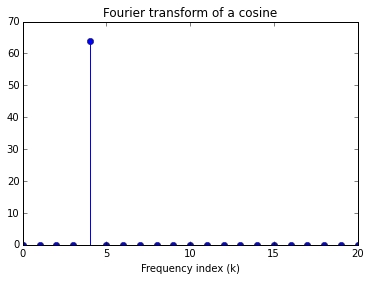

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft
k0=4; N=128; n=np.arange(N); k=np.arange(N)
x=np.sin(2*np.pi*k0*n/N)
X=fft(x)
plt.stem(k,np.abs(X))
plt.xlim([0, 20])
plt.title("Fourier transform of a cosine")
_=plt.xlabel("Frequency index (k)")

## 2.3 Second example

This example shows a series of environments, with different facets; **links, references, markdown or/and LaTeX formatting within environments**. Again, the rendering is done according to the stylesheet `latex_env.css`, which can be customized. The listing of environments below is typed using the environment *listing*...

\begin{listing}
\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
$$
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
$$
\end{definition}

\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}

\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
$$
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
$$
which has finite support. 
\end{proof}

\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}

\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.

\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}

\end{listing}

The lines above are rendered as follows (of course everything can be tailored in the stylesheet):

\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
\begin{equation}
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
\end{equation}
\end{definition}
Properties of the filter are linked to the coefficients of the difference equation. For instance, an immediate property is 

\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}

\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
\begin{equation}
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
\end{equation}
which has finite support. 
\end{proof}


\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}


\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.

\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}



\begin{listing}
The solution of exercise \ref{ex:exofilter}, which uses a difference equation as in Definition \ref{def:diffeq}:
\end{listing}
The solution of exercise \ref{ex:exofilter}, which uses a difference equation as in Definition \ref{def:diffeq}:

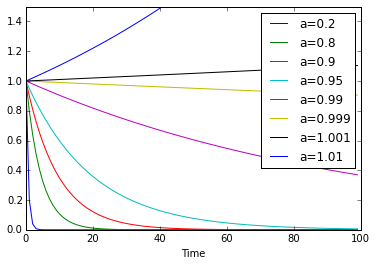

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import lfilter
d=np.zeros(100); d[0]=1 #dirac impulse
alist=[0.2, 0.8, 0.9, 0.95, 0.99, 0.999, 1.001, 1.01]
for a in alist:
    h=lfilter([1], [1, -a],d)
    _=plt.plot(h, label="a={}".format(a))
plt.ylim([0,1.5])
plt.xlabel('Time')
_=plt.legend()

## 2.4 Third example:

This example shows that environments like itemize or enumerate are also available. As already indicated, this is useful for copying text from a TeX file. Following the same idea, text formating commands `\textit`, `\textbf`, `\underline`, etc are also available.

\begin{listing}
The following \textit{environments} are available:
\begin{itemize}
    \item \textbf{Theorems and likes}
    \begin{enumerate}
        \item theorem,
        \item lemma,
        \item corollary
        \item ...
    \end{enumerate}
    \item \textbf{exercises}
    \begin{enumerate}
        \item problem,
        \item example,
        \item exercise
    \end{enumerate}
\end{itemize}
\end{listing}

which gives... 

The following \textit{environments} are available:
\begin{itemize}
\item \textbf{Theorems and likes}
\begin{enumerate}
\item theorem,
\item lemma,
\item corollary
\item ...
\end{enumerate}
\item \textbf{exercises}
\begin{enumerate}
\item problem,
\item example,
\item exercise
\end{enumerate}
\end{itemize}

# 3. (post)-Converters

The extension works in the live-notebook. Since it relies on a bunch of javascript, the notebook does not render as is in very nice services such as `nbviewer` or `github` viewer. Similarly, `nbconvert` does not know of the LaTeX constructs which are used and therefore do not fully convert notebooks making use of this extension. Therefore, it is necessary to add a post conversion step to conversions provided by `nbconvert`. Though an interface exists for adding post-converters to nbconvert, this (first) author was too lazy and not enough strong to implement the post conversion along these lines. What has be done are simple `bash` and `python` scripts that perform this conversion.

## 3.1 Installation

The scripts are located in the conversion subdirectory. Copy the scripts to a directory in your search path, or launch the scripts with the complete path. The two main scripts are `ipynb_thms_to_html` (conversion to html, of course:) and `ipynb_thms_to_latex`  (conversion to LaTeX!).

## 3.2 Conversion to html

**Requirements**: You will need `perl`, `nodejs`, and `ipython3` (the script calls `ipython3`; if your interpreter is `ipython`, edit the script and replace the different occurences).

**Configuration**: 
- If you still use IPython 3.x (not Jupyter), edit `ipynb_thms_to_html` and set the variable `stillIPython3=true`. IPython 3.x will also have to change the `nbextensionsDir` to `/.ipython/nbextensions` in the file `post_html_thms.js`. 
- Finally **all users** should check the path for their `marked.js` library as indicated in `post_html_thms.js`. On Debian, it is located 
`/usr/share/jupyter/notebook/static/components/marked/lib/marked.js`. It shoud be similar for other flavors of linux
(may be `/usr/local/share/...`). 
You may locate the right library by issuing `locate -eb0P marked.js | xargs -r0 ls -ald` on the command line. Please update the variable `marked` for your system in `post_html_thms.js`. 

The conversion to html is done by something like 

        [path/]ipynb_thms_to_html filename
or a list of files such as

        [path/]ipynb_thms_to_html *.ipynb
In turn, this script makes somes substitutions using `perl`, and then uses the `nodesj` javascript interpreter to make the very same substitutions that are done in the live notebook.
The conversion uses the template `thmsInNb.tpl` (located in the script directory). It also copies the css `latex_env.css` in the directory of the output html file (it must be copied with html files in the case of web upload).

## 3.3 Conversion to LaTeX

**Requirements**: You will need `perl` and `ipython3`. 

The conversion to LaTeX is done by something like 

        [path/]ipynb_thms_to_latex filename
or a list of files such as

        [path/]ipynb_thms_to_latex *.ipynb
        
The script makes some substitutions and cleaning in markdown cells, then calls the legacy `nbconvert`. Afterward, it runs through the LaTeX environments and converts their contents (which can contain markdown markup) to  LaTeX. Note that the script contains a list of the LaTeX environments to process. In the case of the addition of an environment in the main javascript (`thmsInNb.js`), this list must also be updated. 

Finally, the script removes the header and footer in the LaTeX file. This is a personnal choice, and the corresponding line can be safely commented. 

\begin{example}
As for an example, the present document has been converted using
    
    ipynb_thms_to_latex latex_env_doc.ipynb
    
Then the resulting file (without header/footer) has been included in the main file `documentation.tex`, where some LaTeX definitions of environments are done (namely listings, colors, etc) and compiled using 
    
    xelatex documentation
    
The output can be consulted [here](documentation.pdf).    
\end{example}

# 4. Disclaimer, sources and thanks

This is a not-quick but certainly dirty hack. I am a complete beginner in javascript and of course there are obviously a large amount of possible improvements of the code, in cleaning, factorizing, etc! Language also needs improvement. 

**Contributions will be welcome and deeply appreciated.** 

Originally, I used a piece of code from the nice online markdown editor `stackedit` [https://github.com/benweet/stackedit/issues/187](https://github.com/benweet/stackedit/issues/187), where the authors also considered the problem of incorporating LaTeX markup in their markdown. I also used examples and code from [https://github.com/ipython-contrib/IPython-notebook-extensions](https://github.com/ipython-contrib/IPython-notebook-extensions). 


# References

(<a id="cit-PER-GRA:2007" href="#call-PER-GRA:2007">P\'erez and Granger, 2007</a>) P\'erez Fernando and Granger Brian E., ``_IPython: a System for Interactive Scientific Computing_'', Computing in Science and Engineering, vol. 9, number 3, pp. 21--29, May 2007.  [online](http://ipython.org)

(<a id="cit-mckinney2012python" href="#call-mckinney2012python">McKinney, 2012</a>) Wes McKinney, ``_Python for data analysis: Data wrangling with Pandas, NumPy, and IPython_'',  2012.

(<a id="cit-rossant2013learning" href="#call-rossant2013learning">Rossant, 2013</a>) Cyrille Rossant, ``_Learning IPython for interactive computing and data visualization_'',  2013.

(<a id="cit-shen2014interactive" href="#call-shen2014interactive">Shen, 2014</a>) Shen Helen, ``_Interactive notebooks: Sharing the code_'', Nature, vol. 515, number 7525, pp. 151--152,  2014.

